## Sobel filter the image

**(a) Using cv2.filter2D to Sobel Filter the Image**

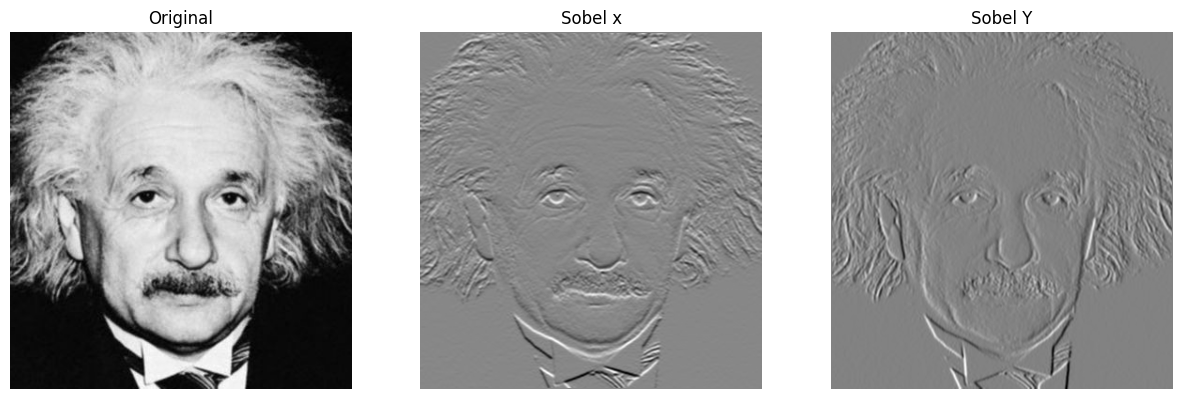

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the Einstein image in grayscale
image_path = r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\einstein.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

sobel_y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

g_x = cv2.filter2D(image, cv2.CV_32F, sobel_x)
g_y = cv2.filter2D(image, cv2.CV_32F, sobel_y)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g_x + 255, cmap='gray') # increase brightness
ax[1].set_title('Sobel x')
ax[1].axis('off')
ax[2].imshow(g_y + 255, cmap='gray') # increase brightness
ax[2].set_title('Sobel Y')
ax[2].axis('off')
plt.show()

**(b) My own code to Sobel filter the image**

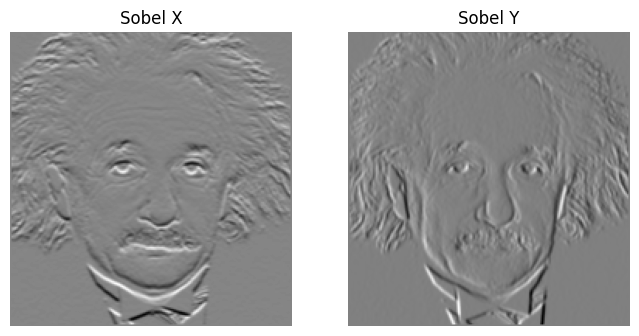

In [28]:
# Custom Sobel filter
img = cv2.imread(image_path, cv2.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

def sobel_filter(image, kernel):
    M, N = image.shape
    (k, k) = kernel.shape
    
    # Sobel filtering without padding
    filtered_image = np.zeros((M, N), dtype=np.float64)

    for i in range(1, M - k + 2):
        for j in range(1, N - k + 2):
            filtered_image[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * kernel)

    return filtered_image

# Kernel for Sobel filter
sobel_kernal_x = sobel_x
sobel_kernal_y = sobel_y

# Apply the Sobel filter to the image
sobel_x_custom = sobel_filter(img, sobel_kernal_x)
sobel_y_custom = sobel_filter(img, sobel_kernal_y)

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(sobel_x_custom, cmap='gray')
ax[0].set_title('Sobel X')
ax[1].imshow(sobel_y_custom, cmap='gray')
ax[1].set_title('Sobel Y')
for a in ax:
    a.axis('off')
plt.show()

**(c) Using the Property**

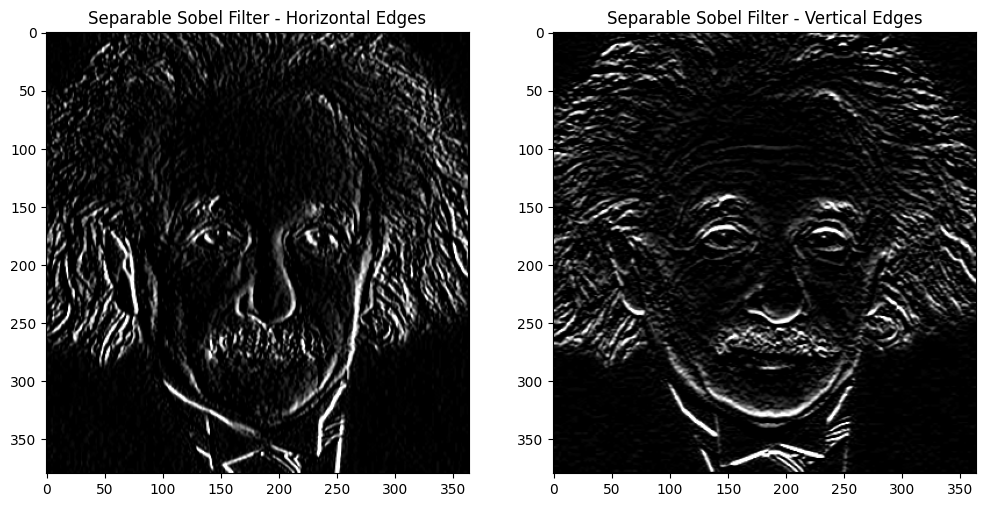

In [29]:
# Load the Einstein image in color
color_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

horizontal_kernel_row = np.array([[1, 0, -1]])  # 1x3
horizontal_kernel_col = np.array([[1], [2], [1]])  # 3x1

# Apply separable Sobel filtering for horizontal edges
separable_horizontal_edges = cv2.filter2D(color_image, -1, horizontal_kernel_row)
separable_horizontal_edges = cv2.filter2D(separable_horizontal_edges, -1, horizontal_kernel_col)

# Sobel filter split into two 1D filters for vertical edge detection
vertical_kernel_row = np.array([[1], [0], [-1]])  # 3x1
vertical_kernel_col = np.array([[1, 2, 1]])  # 1x3

# Apply separable Sobel filtering for vertical edges
separable_vertical_edges = cv2.filter2D(color_image, -1, vertical_kernel_row)
separable_vertical_edges = cv2.filter2D(separable_vertical_edges, -1, vertical_kernel_col)

# Display the separable Sobel filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(separable_horizontal_edges, cmap='gray')
plt.title('Separable Sobel Filter - Horizontal Edges')

plt.subplot(1, 2, 2)
plt.imshow(separable_vertical_edges, cmap='gray')
plt.title('Separable Sobel Filter - Vertical Edges')

plt.show()

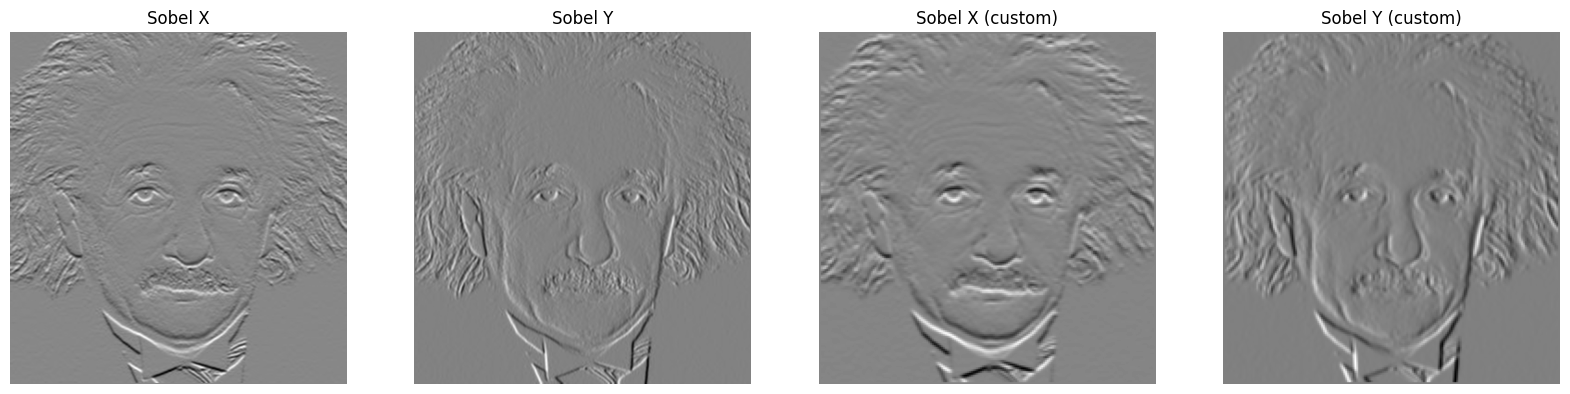

In [30]:
# display Sobel X using filter, Sobel Y using filter, Sobel X (custom), Sobel Y (custom) in one row
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(g_x + 255, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].axis('off')
ax[1].imshow(g_y + 255, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].axis('off')
ax[2].imshow(sobel_x_custom, cmap='gray')
ax[2].set_title('Sobel X (custom)')
ax[2].axis('off')
ax[3].imshow(sobel_y_custom, cmap='gray')
ax[3].set_title('Sobel Y (custom)')
ax[3].axis('off')
plt.show()